In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import Point, Segment

### Reference sample for trace 1 + more traces

In [425]:
ref1 = pd.read_csv('data/feri_logy_analyza/200629_karting/kartfinal36pr3r.csv', header=None, sep=';')

In [426]:
ref1 = ref1.drop(columns=[0, 1, 3, 5, 7, 9, 11, 13, 15, 17])
ref1.columns = ['LAT', 'LON', 'UTMX', 'UTMY', 'HMSL', 'GSPEED', 'CRS', 'HACC', 'NXPT']

In [427]:
ref1

,LAT,LON,UTMX,UTMY,HMSL,GSPEED,CRS,HACC,NXPT
0,480492143,175678361,69136003,532496037,119322,108,21910375,141,5
1,480492134,175678352,69135997,532496027,119324,103,21570312,141,6
2,480492127,175678343,69135990,532496019,119315,111,21556731,141,8
3,480492119,175678334,69135984,532496010,119315,112,21661797,141,9
4,480492111,175678325,69135977,532496001,119313,105,21701829,141,10
...,...,...,...,...,...,...,...,...,...
1416,480492388,175678675,69136228,532496318,119330,97,21431455,141,1
1417,480492381,175678669,69136224,532496310,119324,84,21663436,141,1
1418,480492376,175678662,69136219,532496304,119318,81,21529932,141,1
1419,480492371,175678657,69136215,532496298,119321,80,21579600,141,1


In [428]:
traces1 = pd.read_csv('data/feri_logy_analyza/200629_karting/200629130554_gps.log', header=None, sep=';')

In [429]:
traces1 = traces1.drop(columns=[0, 1, 3, 5, 7, 9, 11, 13, 15, 17])
traces1.columns = ['LAT', 'LON', 'UTMX', 'UTMY', 'HMSL', 'GSPEED', 'CRS', 'HACC', 'NXPT']

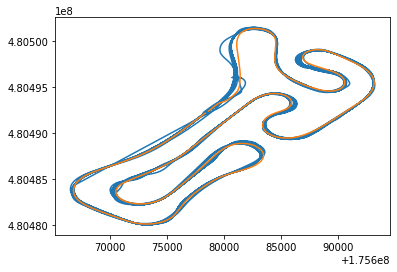

In [430]:
fig = plt.figure()
for frame in [traces1, ref1]:
    plt.plot(frame['LON'], frame['LAT'])

### Reference sample for trace 2 + more traces

In [431]:
ref2 = pd.read_csv('data/200623_academy/trasa23.csv', header=None, sep=';')
ref2 = ref2.drop(columns=[0, 1, 3, 5, 7, 9, 11, 13, 15, 17])
ref2.columns = ['LAT', 'LON', 'UTMX', 'UTMY', 'HMSL', 'GSPEED', 'CRS', 'HACC', 'NXPT']

In [432]:
traces2 = pd.read_csv('data/200623_academy/200623111152_gps.log', header=None, sep=';')
traces2 = traces2.drop(columns=[0, 1, 3, 5, 7, 9, 11, 13, 15, 17])
traces2.columns = ['LAT', 'LON', 'UTMX', 'UTMY', 'HMSL', 'GSPEED', 'CRS', 'HACC', 'NXPT']

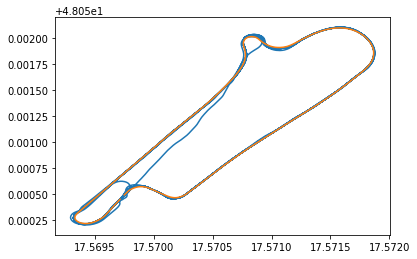

In [464]:
fig2 = plt.figure()
for frame in [traces2, ref2]:
    plt.plot(frame['LON'], frame['LAT'])

In [434]:
traces3 = pd.read_csv('data/200623_academy/200623121213_gps.log', header=None, sep=';')
traces3 = traces3.drop(columns=[0, 1, 3, 5, 7, 9, 11, 13, 15, 17])
traces3.columns = ['LAT', 'LON', 'UTMX', 'UTMY', 'HMSL', 'GSPEED', 'CRS', 'HACC', 'NXPT']

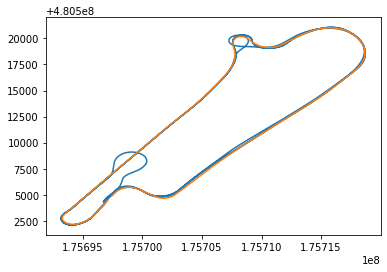

In [435]:
fig3 = plt.figure()
for frame in [traces3, ref2]:
    plt.plot(frame['LON'], frame['LAT'])

### Data normalization

In [436]:
# divide lat and lon by 10 000 000
for frame in [ref1, traces1, ref2, traces2, traces3]:
    frame['LAT'] = frame['LAT'].apply(lambda x: x * 0.0000001)
    frame['LON'] = frame['LON'].apply(lambda x: x * 0.0000001)

In [437]:
ref1

,LAT,LON,UTMX,UTMY,HMSL,GSPEED,CRS,HACC,NXPT
0,48.049214,17.567836,69136003,532496037,119322,108,21910375,141,5
1,48.049213,17.567835,69135997,532496027,119324,103,21570312,141,6
2,48.049213,17.567834,69135990,532496019,119315,111,21556731,141,8
3,48.049212,17.567833,69135984,532496010,119315,112,21661797,141,9
4,48.049211,17.567832,69135977,532496001,119313,105,21701829,141,10
...,...,...,...,...,...,...,...,...,...
1416,48.049239,17.567867,69136228,532496318,119330,97,21431455,141,1
1417,48.049238,17.567867,69136224,532496310,119324,84,21663436,141,1
1418,48.049238,17.567866,69136219,532496304,119318,81,21529932,141,1
1419,48.049237,17.567866,69136215,532496298,119321,80,21579600,141,1


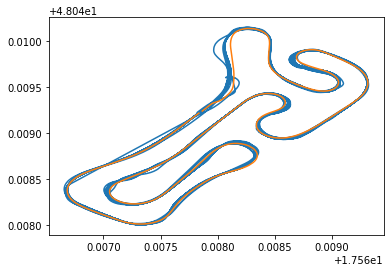

In [438]:
fig = plt.figure()
for frame in [traces1, ref1]:
    plt.plot(frame['LON'], frame['LAT'])

OK, so far so good

In [439]:
# divide gspeed by 100 (cm/s -> m/s)
for frame in [ref1, traces1, ref2, traces2, traces3]:
    frame['GSPEED'] = frame['GSPEED'].apply(lambda x: x * 0.01)

In [440]:
ref1

,LAT,LON,UTMX,UTMY,HMSL,GSPEED,CRS,HACC,NXPT
0,48.049214,17.567836,69136003,532496037,119322,1.08,21910375,141,5
1,48.049213,17.567835,69135997,532496027,119324,1.03,21570312,141,6
2,48.049213,17.567834,69135990,532496019,119315,1.11,21556731,141,8
3,48.049212,17.567833,69135984,532496010,119315,1.12,21661797,141,9
4,48.049211,17.567832,69135977,532496001,119313,1.05,21701829,141,10
...,...,...,...,...,...,...,...,...,...
1416,48.049239,17.567867,69136228,532496318,119330,0.97,21431455,141,1
1417,48.049238,17.567867,69136224,532496310,119324,0.84,21663436,141,1
1418,48.049238,17.567866,69136219,532496304,119318,0.81,21529932,141,1
1419,48.049237,17.567866,69136215,532496298,119321,0.80,21579600,141,1


In [441]:
# divide crs by 100 000
for frame in [ref1, traces1, ref2, traces2, traces3]:
    frame['CRS'] = frame['CRS'].apply(lambda x: x * 0.00001)

In [442]:
ref1

,LAT,LON,UTMX,UTMY,HMSL,GSPEED,CRS,HACC,NXPT
0,48.049214,17.567836,69136003,532496037,119322,1.08,219.10375,141,5
1,48.049213,17.567835,69135997,532496027,119324,1.03,215.70312,141,6
2,48.049213,17.567834,69135990,532496019,119315,1.11,215.56731,141,8
3,48.049212,17.567833,69135984,532496010,119315,1.12,216.61797,141,9
4,48.049211,17.567832,69135977,532496001,119313,1.05,217.01829,141,10
...,...,...,...,...,...,...,...,...,...
1416,48.049239,17.567867,69136228,532496318,119330,0.97,214.31455,141,1
1417,48.049238,17.567867,69136224,532496310,119324,0.84,216.63436,141,1
1418,48.049238,17.567866,69136219,532496304,119318,0.81,215.29932,141,1
1419,48.049237,17.567866,69136215,532496298,119321,0.80,215.79600,141,1


In [443]:
# drop unnecessary columns
ref1 = ref1.drop(columns=['UTMX', 'UTMY', 'HMSL', 'HACC', 'NXPT'])
traces1 = traces1.drop(columns=['UTMX', 'UTMY', 'HMSL', 'HACC', 'NXPT'])
ref2 = ref2.drop(columns=['UTMX', 'UTMY', 'HMSL', 'HACC', 'NXPT'])
traces2 = traces2.drop(columns=['UTMX', 'UTMY', 'HMSL', 'HACC', 'NXPT'])
traces3 = traces3.drop(columns=['UTMX', 'UTMY', 'HMSL', 'HACC', 'NXPT'])

In [444]:
ref1

,LAT,LON,GSPEED,CRS
0,48.049214,17.567836,1.08,219.10375
1,48.049213,17.567835,1.03,215.70312
2,48.049213,17.567834,1.11,215.56731
3,48.049212,17.567833,1.12,216.61797
4,48.049211,17.567832,1.05,217.01829
...,...,...,...,...
1416,48.049239,17.567867,0.97,214.31455
1417,48.049238,17.567867,0.84,216.63436
1418,48.049238,17.567866,0.81,215.29932
1419,48.049237,17.567866,0.80,215.79600


In [445]:
# create columns for lat and lon af the next position and add the to the dataframe 
for frame in [ref1, traces1, ref2, traces2, traces3]:
    next_lat = frame['LAT']
    next_lat = next_lat.append(pd.Series([np.nan]), ignore_index=True)
    next_lat = next_lat.iloc[1:]
    next_lat = next_lat.reset_index(drop=True)
    
    next_lon = frame['LON']
    next_lon = next_lon.append(pd.Series([np.nan]), ignore_index=True)
    next_lon = next_lon.iloc[1:]
    next_lon = next_lon.reset_index(drop=True)
    
    frame['NLAT'] = next_lat
    frame['NLON'] = next_lon

In [446]:
ref1

,LAT,LON,GSPEED,CRS,NLAT,NLON
0,48.049214,17.567836,1.08,219.10375,48.049213,17.567835
1,48.049213,17.567835,1.03,215.70312,48.049213,17.567834
2,48.049213,17.567834,1.11,215.56731,48.049212,17.567833
3,48.049212,17.567833,1.12,216.61797,48.049211,17.567832
4,48.049211,17.567832,1.05,217.01829,48.049210,17.567832
...,...,...,...,...,...,...
1416,48.049239,17.567867,0.97,214.31455,48.049238,17.567867
1417,48.049238,17.567867,0.84,216.63436,48.049238,17.567866
1418,48.049238,17.567866,0.81,215.29932,48.049237,17.567866
1419,48.049237,17.567866,0.80,215.79600,48.049237,17.567865


In [447]:
# drop the last rows which contain NaN
ref1 = ref1.dropna()
traces1 = traces1.dropna()
ref2 = ref2.dropna()
traces2 = traces2.dropna()
traces3 = traces3.dropna()

In [560]:
ref1

,LAT,LON,GSPEED,CRS,NLAT,NLON
0,48.049214,17.567836,1.08,219.10375,48.049213,17.567835
1,48.049213,17.567835,1.03,215.70312,48.049213,17.567834
2,48.049213,17.567834,1.11,215.56731,48.049212,17.567833
3,48.049212,17.567833,1.12,216.61797,48.049211,17.567832
4,48.049211,17.567832,1.05,217.01829,48.049210,17.567832
...,...,...,...,...,...,...
1415,48.049239,17.567868,0.95,211.98998,48.049239,17.567867
1416,48.049239,17.567867,0.97,214.31455,48.049238,17.567867
1417,48.049238,17.567867,0.84,216.63436,48.049238,17.567866
1418,48.049238,17.567866,0.81,215.29932,48.049237,17.567866


Still seems just fine

In [449]:
# # now it's good time to merge traces2 and traces3
# # probably it's better idea not to merge them
# traces2 = pd.concat([traces2, traces3])
# traces2 = traces2.reset_index(drop=True)

# traces2

In [450]:
# save normalized data
ref1.to_csv('data/ref1.csv', index=False)
traces1.to_csv('data/traces1.csv', index=False)
ref2.to_csv('data/ref2.csv', index=False)
traces2.to_csv('data/traces2-1.csv', index=False)
traces3.to_csv('data/traces2-2.csv', index=False)

In [541]:
def separate_laps(traces, traces_id, distance_multiplier=None):
    # TODO: in case of need modify number
    distance_multiplier = distance_multiplier or 100

    points = list()
    for i in range(len(traces)):
        points.append([traces['LON'][i], traces['LAT'][i]])

    # use last points to determine normal vector
    # TODO: consider using last points from ref traces instead of these last points
    last_point1 = points[-1]
    last_point2 = points[-2]
    i = -2

    if last_point1 == last_point:
        while (round(last_point1[0], 6) == round(last_point2[0], 6) 
               and round(last_point1[1], 6) == round(last_point2[1], 6)):
            i -= 1
            last_point2 = points[i]

    a = last_point1[0] - last_point2[0]
    b = last_point1[1] - last_point2[1]
    
    v = np.array([a, b])
    v_normal = np.array([-b, a])
    start_point = np.array(last_point2)

    point_top = Point(start_point + distance_multiplier * v_normal, evaluate=False)
    point_bottom = Point(start_point - distance_multiplier * v_normal, evaluate=False)
    start_line = Segment(point_top, point_bottom, evaluate=False)
    
    laps = list()
    laps_pairs = list()

    for i in range(len(points) - 2):
        dx = points[i + 1][0] - points[i][0] # difference in longitude
        dy = points[i + 1][1] - points[i][1] # difference in lattitude
        point1 = Point(points[i][0], points[i][1], evaluate=False)
        point2 = Point(points[i + 1][0], points[i + 1][1], evaluate=False)

        if point1 == point2:
            continue

        # "usecka" between point1 and point2
        segment = Segment(point1, point2, evaluate=False)
        intersection = segment.intersection(start_line)

        # add start of a new lap
        if intersection:
            laps.append(i + 1)
            print('Lap ending at index: {}'.format(i))
            
    # save the circuits (laps)
    for i in range(len(laps) - 1):
        lap_df = traces.iloc[laps[i] : laps[i + 1]]
        lap_df.to_csv('data/laps/lap{}-{}.csv'.format(traces_id, i), index=False)

    # tha last circuit (lap) was not saved yet so save that one
    lap_df = traces.iloc[laps[-1]:]
    lap_df.to_csv('data/laps/lap{}-{}.csv'.format(traces_id, len(laps) - 1), index=False)
            
    # draw laps     
    laps_pairs = list()
    for i in range(0, len(laps) - 2):
        laps_pairs.append([laps[i], laps[i + 1]])

    print(laps_pairs)

    fig, axes = plt.subplots(nrows=len(laps_pairs)//2,ncols=2)
    fig.set_size_inches(20, 50)

    for i, ax in enumerate(axes.flatten()):
        ax.plot(traces3['LON'][laps_pairs[i][0]:laps_pairs[i][1]], traces3['LAT'][laps_pairs[i][0]:laps_pairs[i][1]])
    
    

In [515]:
separate_laps(traces2, 2)

Lap ending at index: 1176
Lap ending at index: 4153
Lap ending at index: 5657
Lap ending at index: 7441
Lap ending at index: 9192
Lap ending at index: 11378
Lap ending at index: 13299
Lap ending at index: 14812
Lap ending at index: 16581
Lap ending at index: 18057
Lap ending at index: 20022
Lap ending at index: 22190
Lap ending at index: 23605
Lap ending at index: 24711
Lap ending at index: 26284
Lap ending at index: 28331
Lap ending at index: 28332


In [527]:
separate_laps(traces3, 3)

Lap ending at index: 298
Lap ending at index: 1714
Lap ending at index: 3142
Lap ending at index: 4333
Lap ending at index: 4430
Lap ending at index: 4555
Lap ending at index: 5618
Lap ending at index: 5619


In [564]:
distance_multiplier = 1000

points = list()
for i in range(len(traces1)):
    points.append([traces1['LON'][i], traces1['LAT'][i]])

# use last points to determine normal vector
# TODO: consider using last points from ref traces instead of these last points
last_point1 = points[-1]
last_point2 = points[-2]
i = -2

while (round(last_point1[0], 6) == round(last_point2[0], 6) 
       and round(last_point1[1], 6) == round(last_point2[1], 6)):
    i -= 1
    last_point2 = points[i]

a = last_point1[0] - last_point2[0]
b = last_point1[1] - last_point2[1]

v = np.array([a, b])
v_normal = np.array([-b, a])
start_point = np.array(last_point2)

point_top = Point(start_point + distance_multiplier * v_normal, evaluate=False)
point_bottom = Point(start_point - distance_multiplier * v_normal, evaluate=False)
start_line = Segment(point_top, point_bottom, evaluate=False)

[17.5678275, 48.0492002] [17.5678274, 48.0492002]


In [592]:
laps = list()

for i in range(len(points) - 2):
    dx = points[i + 1][0] - points[i][0] # difference in longitude
    dy = points[i + 1][1] - points[i][1] # difference in lattitude
    point1 = Point(points[i][0], points[i][1], evaluate=False)
    point2 = Point(points[i + 1][0], points[i + 1][1], evaluate=False)

    if point1 == point2:
        continue

    # "usecka" between point1 and point2
    segment = Segment(point1, point2, evaluate=False)
    intersection = segment.intersection(start_line)

    # add start of a new lap
    if intersection:
        laps.append(i + 1)
        print('Lap ending at index: {}'.format(i))

Lap ending at index: 2921
Lap ending at index: 2922
Lap ending at index: 2925
Lap ending at index: 4150
Lap ending at index: 5707
Lap ending at index: 10357
Lap ending at index: 11495
Lap ending at index: 13786
Lap ending at index: 13787
Lap ending at index: 15567
Lap ending at index: 17029
Lap ending at index: 18137
Lap ending at index: 19777
Lap ending at index: 21970
Lap ending at index: 23039
Lap ending at index: 23041
Lap ending at index: 23074
Lap ending at index: 23075
Lap ending at index: 23076
Lap ending at index: 23077
Lap ending at index: 23078
Lap ending at index: 23080
Lap ending at index: 23099
Lap ending at index: 23107
Lap ending at index: 23109
Lap ending at index: 23114
Lap ending at index: 23115
Lap ending at index: 23116
Lap ending at index: 23117
Lap ending at index: 23118
Lap ending at index: 23122
Lap ending at index: 23123
Lap ending at index: 23124
Lap ending at index: 23126
Lap ending at index: 23127
Lap ending at index: 23128
Lap ending at index: 23129
Lap en

Lap ending at index: 50891
Lap ending at index: 50895
Lap ending at index: 50896
Lap ending at index: 50901
Lap ending at index: 50903
Lap ending at index: 50910
Lap ending at index: 50911
Lap ending at index: 50918
Lap ending at index: 50919
Lap ending at index: 50921
Lap ending at index: 51050
Lap ending at index: 51060
Lap ending at index: 51062
Lap ending at index: 51065
Lap ending at index: 51066
Lap ending at index: 51067
Lap ending at index: 51069
Lap ending at index: 51071


In [594]:
len(laps)

329

In [648]:
# save the circuits (laps)
for i in range(len(laps) - 1):
    if laps[i + 1] - laps[i] + 1 > 100:
        lap_df = traces1.iloc[laps[i] : laps[i + 1]]
        lap_df.to_csv('data/laps/lap1-{}.csv'.format(i), index=False)

# # tha last circuit (lap) was not saved yet so save that one
# lap_df = traces1.iloc[laps[-1]:]
# lap_df.to_csv('data/laps/lap1-{}.csv'.format(len(laps) - 1), index=False)

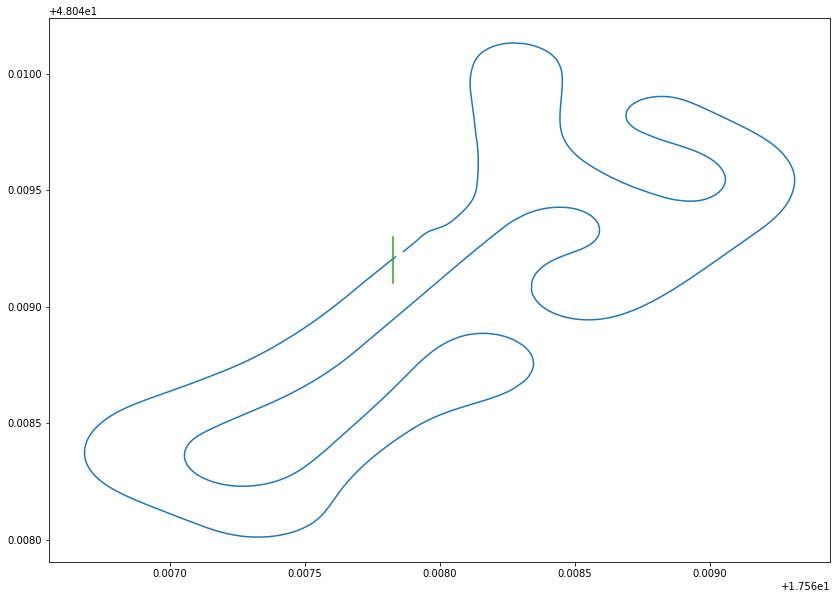

In [647]:
i = 80
lap_df = traces1.iloc[laps[i] : laps[i + 1]]
fig = plt.figure(figsize=(14, 10))
plt.plot(ref1['LON'], ref1['LAT'])
plt.plot(lap_df['LON'], lap_df['LAT'])
plt.plot([point_top[0], point_bottom[0]], [point_top[1], point_bottom[1]])
# 2 3 4 5 6 8 9 10 11 12 13 44 46 47 48 49 50 51-56

In [ ]:
# NOTE: there are many rows with the same pair (LAT, LON) which results in multiple laps made out of 1 point
# TODO: remove rows with duplocit pairs (LAT, LON)